# House Price Dataset

### Models used with hyperparameters :

Linear Regression

KNN Regression(No. of neighbors and metric)

Ridge (Alpha)

Lasso (Alpha)

Polynomial Regression( polynomialfeatures__degree,polynomialfeatures__interaction_only)

SVM Models : Linear (C) rbf (C, gamma) Sigmoid (C, gamma) Polynomial (C, degree, gamma)

Decision Tree (max_depth, splitter)

Stochastic Gradient Descent (eta, penalty, alpha)

Elastic Net (Alpha, L1 ratio)

Bagging : Decision Tree (base_estimator__max_depth,max_samples, n_estimators) Lasso Regression (base_estimator__alpha)

Pasting : Decision Tree (base_estimator__max_depth,max_samples, n_estimators) Logistic Regression (base_estimator__alpha)

Random Forests (n_estimators, max_features,max_depth,criterion)

Ada Boost (base_estimator__criterion, base_estimator__splitter,base_estimator__max_depth, n_estimators,learning_rate)

Gradient Boost (max_depth, n_estimators, learning_rate)

Extra Trees (n_estimators,max_features, max_depth,criterion)

XG Boost ('max_depth,n_estimators,learning_rate,min_child_weight,subsample)

### XGBoost Classifier is the best model as the cross validation score is high and the difference between train score and test score is less.

Best model based on Scoring Method = Accuracy

The best model choosen based on CV score (0.85) is : XG Boost.

Best Mean Cross Validation Score is 0.9071588881611858

Parameters for the model {n_estimators=80, max_depth=6, learning_rate=0.1, objective='reg:squarederror'}

Train score is 0.9089649260328002

Test score is 0.8909787231834181

### Importing Libraries

In [1]:
!pip install feature-engine

In [2]:
from math import sqrt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from pathlib import Path

pd.pandas.set_option('display.max_columns', None)
%matplotlib inline

### Importing the data set

In [3]:
data = pd.read_csv('houseprice.csv')

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Types of variables

In [4]:
# we have an Id variable, that we should not use for predictions:

print('Number of House Id labels: ', len(data.Id.unique()))
print('Number of Houses in the Dataset: ', len(data))

Number of House Id labels:  1460
Number of Houses in the Dataset:  1460


### Find categorical variables

In [5]:
# find categorical variables- hint data type = 'O'

categorical = [var for var in data.columns if data[var].dtype=='O']

print(f'There are {len(categorical)} categorical variables')

There are 43 categorical variables


### Find temporal variables

In [6]:
# make a list of the numerical variables first= Hint data type != O
numerical = [var for var in data.columns if data[var].dtype!='O']

# list of variables that contain year information= Hint variable namme has Yr or 
year_vars = [var for var in numerical if 'Yr' in var or 'Year' in var]

year_vars

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

### Find discrete variables 

##### To identify discrete variables- numerical variables with less than 20 unique values

In [7]:
# let's visualise the values of the discrete variables
discrete = [var for var in numerical if len(data[var].unique()) < 20 and var not in year_vars]

print(f'There are {len(discrete)} discrete variables')

There are 14 discrete variables


### Continuous variables

In [8]:
# find continuous variables- hint numerical variables not in discrete and  year_years 
# Also remove the Id variable and the target variable SalePrice
# which are both also numerical

continuous = [var for var in numerical if var not in discrete and var not in [
    'Id', 'SalePrice'] and var not in year_vars]

print('There are {} numerical and continuous variables'.format(len(numerical)))

There are 38 numerical and continuous variables


### Separate train and test set

In [9]:
# Let's separate into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop(['Id', 'SalePrice'], axis=1),
                                                    data['SalePrice'],
                                                    test_size=0.1,
                                                    random_state=0)

X_train.shape, X_test.shape

((1314, 79), (146, 79))

### Create New Variables

##### Replace 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt with time elapsed since YrSold So YearBuilt = YrSold-YearBuilt.
##### Similarly transform 'YearRemodAdd', 'GarageYrBlt. After making transformation drop YrSold

In [10]:
# function to calculate elapsed time

def elapsed_years(df, var):
    # capture difference between year variable and
    # year the house was sold
    
    df[var] = df['YrSold'] - df[var]
    return df

In [11]:
for var in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    X_train = elapsed_years(X_train, var)
    X_test = elapsed_years(X_test, var)

In [12]:
# drop YrSold
X_train.drop('YrSold', axis=1, inplace=True)
X_test.drop('YrSold', axis=1, inplace=True)

In [13]:
year_vars.remove('YrSold')

In [14]:
# capture the column names for use later in the notebook
final_columns = X_train.columns
final_columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

### Feature Engineering Pipeline

In [15]:
# Treating discrete variables as if they were categorical
# To treat discrete as categorical using Feature-engine, we need to re-cast them as object

X_train[discrete] = X_train[discrete].astype('O')
X_test[discrete] = X_test[discrete].astype('O')

In [16]:
# import relevant modules for feature engineering
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from feature_engine import missing_data_imputers as mdi
from feature_engine import categorical_encoders as ce
from feature_engine.variable_transformers import YeoJohnsonTransformer
from sklearn.preprocessing import StandardScaler
from feature_engine.discretisers import DecisionTreeDiscretiser
from feature_engine.wrappers import SklearnTransformerWrapper

In [17]:
# Creating the pipeline
house_preprocess = Pipeline([
    
    # missing data imputation 
    ('missing_ind', mdi.AddMissingIndicator(
        variables=['LotFrontage', 'MasVnrArea',  'GarageYrBlt'])),
    ('imputer_num', mdi.MeanMedianImputer(imputation_method='mean',
                                          variables=['LotFrontage', 'MasVnrArea',  'GarageYrBlt'])),
    ('imputer_cat', mdi.CategoricalVariableImputer(imputation_method='missing',variables=categorical)),

    # categorical encoding 
     ('rare_label_enc', ce.RareLabelCategoricalEncoder(
         tol=0.01,n_categories=1, variables=categorical+discrete)),
    ('categorical_enc', ce.MeanCategoricalEncoder(variables = categorical + discrete)),
     
    # Transforming Numerical Variables
    ('yjt', YeoJohnsonTransformer(variables = ['LotFrontage','MasVnrArea', 'GarageYrBlt'])),

    
    # discretisation and encoding
    ('treeDisc',  DecisionTreeDiscretiser(cv=2, scoring='neg_mean_squared_error',
                                   regression=True,
                                   param_grid={'max_depth': [1,2,3,4,5,6]},
                                   )),
    # feature Scaling
    ('scaler', SklearnTransformerWrapper(transformer=StandardScaler())),

  ])

In [18]:
house_preprocess.fit(X_train,y_train)

Pipeline(steps=[('missing_ind',
                 AddMissingIndicator(variables=['LotFrontage', 'MasVnrArea',
                                                'GarageYrBlt'])),
                ('imputer_num',
                 MeanMedianImputer(imputation_method='mean',
                                   variables=['LotFrontage', 'MasVnrArea',
                                              'GarageYrBlt'])),
                ('imputer_cat',
                 CategoricalVariableImputer(variables=['MSZoning', 'Street',
                                                       'Alley', 'LotShape',
                                                       'LandContour',
                                                       'Utilities', 'LotConfig',
                                                       '...
                                                      'LotFrontage', 'LotArea',
                                                      'Street', 'Alley',
                                            

In [19]:
# Apply Transformations
X_train=house_preprocess.transform(X_train)
X_test=house_preprocess.transform(X_test)

### Importing Libraries 

In [20]:
# from feature-engine
from feature_engine import missing_data_imputers as mdi
# for one hot encoding with feature-engine
from feature_engine.categorical_encoders import OneHotCategoricalEncoder
from feature_engine.categorical_encoders import RareLabelCategoricalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from feature_engine.wrappers import SklearnTransformerWrapper
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

### 1. Linear regression model 

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression().fit(X_train, y_train)
n=len(X_train)

cv_scores = cross_val_score(lr, X_train, y_train, cv = 5)

# Mean Cross validation Score
print("Mean Cross-validation scores: {}".format(cv_scores))
print()
print("Mean Cross-validation scores: {}".format(cv_scores.mean()))
print()

# Print Co-efficients
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

# Check test data set performance
print("LR Performance Train: ", lr.score(X_train,y_train))
print("LR Performance Test: ", lr.score(X_test,y_test))

Mean Cross-validation scores: [ 8.66429448e-01 -2.55448890e+24  8.75243469e-01  8.98831713e-01
  8.89229043e-01]

Mean Cross-validation scores: -5.108977792193288e+23

lr.coef_: [ 8.24918946e+02  9.11128681e+02  1.51657181e+03  2.33232658e+03
  1.44140393e+03  3.91448381e+02  5.62100917e+02  1.08538019e+03
  1.45990777e+03  2.29494439e+03  1.24547200e+03  1.13131704e+04
  1.23318677e+03  2.16857904e+03  1.24306313e+03 -8.78022363e+02
  1.58501930e+04 -2.41716335e+02 -5.57296824e+03  3.99839237e+03
  3.46883565e+02 -9.70211848e+02  3.74403450e+03 -2.87220600e+03
 -1.10902884e+03  4.53224648e+02  2.80474162e+03  6.39579405e+02
  1.32587158e+02  2.36348962e+03  5.86837702e+02  3.59436373e+03
  1.22709654e+03  5.65489348e+03 -1.51786935e+03  2.00928583e+03
 -2.64865036e+02  7.47416996e+03  3.04888503e+02  1.43257395e+03
  1.16536791e+03 -7.18553872e+02  1.23534115e+04  1.11366743e+04
  3.98969990e+03  5.81899873e+03  2.88774873e+03 -1.33109420e+03
  4.07095220e+03  5.22553331e+03  6.833207

### 2. KNN regression model

In [22]:
# Train a KNN model, report the coefficients, the best parameters, and model performance 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

# define a list of parameters
param_knn = {'n_neighbors': [5, 10, 15, 20],
             'metric' : ['euclidean', 'manhattan']}


#apply grid search
grid_knn = GridSearchCV(knn, param_knn, cv=7, return_train_score=True)
grid_knn.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_knn.best_score_))
print()

#find best parameters
print('KNN parameters: ', grid_knn.best_params_)

# Check test data set performance
print("KNN Performance Train: ", grid_knn.score(X_train,y_train))
print("KNN Performance Test: ", grid_knn.score(X_test,y_test))

Best Mean Cross-validation score: 0.83

KNN parameters:  {'metric': 'manhattan', 'n_neighbors': 5}
KNN Performance Train:  0.9000524237426366
KNN Performance Test:  0.7744786244161769


### 3. Ridge regression model 

In [23]:
# Train a Ridge regression model, report the coefficients, the best parameters, and model performance 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
ridge = Ridge()

#define a list of parameters
param_ridge = {'alpha':[100,110,120,130,140] }

grid_ridge = GridSearchCV(ridge, param_ridge, cv=5, return_train_score = True)
grid_ridge.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_ridge.best_score_))

print()

#find best parameters
print('Ridge parameters: ', grid_ridge.best_params_)


# Check test data set performance

print("Ridge Train Performance: ", grid_ridge.score(X_train,y_train))
print("Ridge Test Performance: ", grid_ridge.score(X_test,y_test))

Best Mean Cross-validation score: 0.88

Ridge parameters:  {'alpha': 120}
Ridge Train Performance:  0.9100503103599654
Ridge Test Performance:  0.8711496002669079


### 4. Lasso regression model

In [24]:
# Train a Lasso regression model, report the coefficients, the best parameters, and model performance 

from sklearn.linear_model import Lasso
lasso = Lasso(random_state=0, max_iter=1000)

#define a list of parameters
param_lasso = {'alpha':[50,100,200,500] }

grid_lasso = GridSearchCV(lasso, param_lasso, cv=5, return_train_score = True)
grid_lasso.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_lasso.best_score_))
print()

#find best parameters
print('Lasso parameters: ', grid_lasso.best_params_)

# Check test data set performance
print("Lasso Train Performance: ", grid_lasso.score(X_train,y_train))
print("Lasso Test Performance: ", grid_lasso.score(X_test,y_test))

Best Mean Cross-validation score: 0.89

Lasso parameters:  {'alpha': 500}
Lasso Train Performance:  0.9083671561828881
Lasso Test Performance:  0.8830170011564082


### 5. Polynomial regression model 

In [25]:
# Train a polynomial regression model, report the coefficients, the best parameters, and model performance 
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing  import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly = PolynomialFeatures()
lreg = LinearRegression()
#define a list of parameters
param_poly = {'polynomialfeatures__degree':[2],
              'polynomialfeatures__interaction_only' : ['True']}


pipe_poly = make_pipeline(PolynomialFeatures(), LinearRegression())
grid_poly = GridSearchCV(pipe_poly, param_poly,cv=5, return_train_score = True)


grid_poly.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'polynomialfeatures__degree': [2],
                         'polynomialfeatures__interaction_only': ['True']},
             return_train_score=True)

In [26]:
# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_poly.best_score_))
print()

#find best parameters
print('Poly parameters: ', grid_poly.best_params_)

# Check test data set performance
print("Poly Performance Train : ", grid_poly.score(X_train,y_train))
print("Poly Performance Test : ", grid_poly.score(X_test,y_test))


Best Mean Cross-validation score: -30621689114123403526144.00

Poly parameters:  {'polynomialfeatures__degree': 2, 'polynomialfeatures__interaction_only': 'True'}
Poly Performance Train :  0.9999953208191343
Poly Performance Test :  -2.4879957601868596e+22


### 6a. SVM Regression Model (linear)

In [27]:
from sklearn.svm import LinearSVR

svr_linear = LinearSVR(max_iter=10000)

#define a list of parameters
param_svr_linear = {'C': [1000,2000,3000]}

#apply grid search
grid_param_svr_linear = GridSearchCV(svr_linear, param_svr_linear, cv=6, return_train_score = True)
grid_param_svr_linear.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_param_svr_linear.best_score_))
print()

#find best parameters
print('SVR linear parameters: ', grid_param_svr_linear.best_params_)



# Check test data set performance
print("SVR linear Performance train: ", grid_param_svr_linear.score(X_train,y_train))
print("SVR linear Performance test: ", grid_param_svr_linear.score(X_test,y_test))

Best Mean Cross-validation score: 0.89

SVR linear parameters:  {'C': 3000}
SVR linear Performance train:  0.9008363790724896
SVR linear Performance test:  0.8618312762355149


### 6b. SVM Classification Kernel (rbf)

In [28]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svc_kernel = SVR(kernel = 'rbf')

#define a list of parameters
param_svr_kernel = {'C': [10000,15000,50000,55000,60000],
                    'gamma':[0.0001,0.0008, 0.0015,0.0016,0.0018]
                    }

#apply grid search
grid_svr_kernel = GridSearchCV(svc_kernel, param_svr_kernel, cv=5, n_jobs=2)
grid_svr_kernel.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_svr_kernel.best_score_))


#find best parameters
print('SVR parameters: ', grid_svr_kernel.best_params_)

print('train score: ', grid_svr_kernel.score(X_train, y_train))
print('test score: ', grid_svr_kernel.score(X_test, y_test))

Best Mean Cross-validation score: 0.88
SVR parameters:  {'C': 60000, 'gamma': 0.0015}
train score:  0.9036611531916966
test score:  0.7588321630715543


### 6c. SVM Classification Kernel (Sigmoid) 

In [29]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr_kernel = SVR(kernel = 'sigmoid')

#define a list of parameters
param_svr_kernel = {'C': [30000,40000,42000],
                    'gamma':[0.001,0.002,0.003,0.004,0.01]
                    }

#apply grid search
grid_svr_kernel = GridSearchCV(svr_kernel, param_svr_kernel, cv=5, n_jobs=2)
grid_svr_kernel.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_svr_kernel.best_score_))


#find best parameters
print('SVC parameters: ', grid_svr_kernel.best_params_)

print('train score: ', grid_svr_kernel.score(X_train, y_train))
print('test score: ', grid_svr_kernel.score(X_test, y_test))

Best Mean Cross-validation score: 0.87
SVC parameters:  {'C': 42000, 'gamma': 0.003}
train score:  0.8757032119659779
test score:  0.8589645567833304


### 6d. SVM Classification with Poly kernel 

In [30]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr = SVR(kernel = 'poly')

#define a list of parameters
param_svr = {'C': [35000,40000,45000], 
             'degree': [2,3,4],
             'gamma':['scale','auto']}
             

#apply grid search
grid_param_svr = GridSearchCV(svr, param_svr, cv=5, return_train_score = True)
grid_param_svr.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_param_svr.best_score_))
print()

#find best parameters
print('SVC parameters: ', grid_param_svr.best_params_)



# Check test data set performance
print("SVC Performance train: ", grid_param_svr.score(X_train,y_train))
print("SVC Performance test: ", grid_param_svr.score(X_test,y_test))

Best Mean Cross-validation score: 0.81

SVC parameters:  {'C': 35000, 'degree': 3, 'gamma': 'auto'}
SVC Performance train:  0.957927316786163
SVC Performance test:  0.8313291541020024


### 7. Decision Tree 

In [31]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(random_state=0)

#define a list of parameters
param_dtree = {'max_depth': range(2,20),
               'splitter': ['best','random']}

#apply grid search
grid_dtree = GridSearchCV(dtree, param_dtree, cv=8, return_train_score = True)
grid_dtree.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_dtree.best_score_))
print()

#find best parameters
print('Decision Tree parameters: ', grid_dtree.best_params_)

# Check test data set performance
print("Decision Tree Performance train: ", grid_dtree.score(X_train,y_train))
print("Decision Tree Performance test: ", grid_dtree.score(X_test,y_test))

Best Mean Cross-validation score: 0.77

Decision Tree parameters:  {'max_depth': 11, 'splitter': 'best'}
Decision Tree Performance train:  0.9879354141840793
Decision Tree Performance test:  0.8122149577809381


In [32]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(random_state=0)

#define a list of parameters
param_dtree = {'max_leaf_nodes': range(10,20),
               'splitter': ['best','random']}

#apply grid search
grid_dtree = GridSearchCV(dtree, param_dtree, cv=8, return_train_score = True)
grid_dtree.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_dtree.best_score_))
print()

#find best parameters
print('Decision Tree parameters: ', grid_dtree.best_params_)

# Check test data set performance
print("Decision Tree Performance train: ", grid_dtree.score(X_train,y_train))
print("Decision Tree Performance test: ", grid_dtree.score(X_test,y_test))

Best Mean Cross-validation score: 0.76

Decision Tree parameters:  {'max_leaf_nodes': 19, 'splitter': 'best'}
Decision Tree Performance train:  0.8259168797349552
Decision Tree Performance test:  0.8139088472875955


### 8. SGD 

In [33]:
## stochastic gradient descent
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
# create pipeline
reg_sgd = SGDRegressor(max_iter=10000)

param_sgd = {'eta0':[0.06, 0.03, 0.04, 0.05, 0.06,0.07], 
             'penalty' :['l1','l2'],
             'alpha' :[0.1,10,20,30,50] }
grid_sgd = GridSearchCV(reg_sgd, param_sgd,cv=5, n_jobs=-1, return_train_score = True)

grid_sgd.fit(X_train, y_train)

grid_sgd_train_score = grid_sgd.score(X_train, y_train)
grid_sgd_test_score = grid_sgd.score(X_test, y_test)

In [34]:
#find best parameters
print('Best parameters: ', grid_sgd.best_params_)
print('Best cross-validation score:', grid_sgd.best_score_)

print('Training set score: ', grid_sgd_train_score)
print('Test score: ', grid_sgd_test_score)

Best parameters:  {'alpha': 10, 'eta0': 0.06, 'penalty': 'l2'}
Best cross-validation score: 0.7032009961363216
Training set score:  0.7538812365491305
Test score:  0.5681336741770804


### 9. Elastic Net 

In [35]:
# Elastic net
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(max_iter=10000)

#define a list of parameters
param_elasticnet = {'alpha':[0.1,10,15,20,25,100], 'l1_ratio' :[.9, .95, .99, 0.99, 1.0]}

grid_elasticnet = GridSearchCV(elasticnet , param_elasticnet, cv=5, return_train_score = True)

grid_elasticnet.fit(X_train, y_train)

grid_elasticnet_train_score = grid_elasticnet.score(X_train, y_train)
grid_elasticnet_test_score = grid_elasticnet.score(X_test, y_test)

#find best parameters
print('Best parameters: ', grid_elasticnet.best_params_)
print('Best cross-validation score:', grid_elasticnet.best_score_)

print('Training set score: ', grid_elasticnet_train_score)
print('Test score: ', grid_elasticnet_test_score)


Best parameters:  {'alpha': 10, 'l1_ratio': 0.99}
Best cross-validation score: 0.88376495325896
Training set score:  0.9097834862483082
Test score:  0.8709967643825017


### Having worked on multiple models for the titanic dataset, we have concluded that the below algorithm with the specified parameters will give us a best result for regression task in predicting the value of the target variable 'Saleprice'

The best model choosen based on CV score is : Lasso

The Mean Cross validation score of Lasso: 0.89

Though Linear SVM also had the same Mean Cross validation score of 0.89, Lasso was chosen since it is a simpler model

The parameters for this model are: {'alpha': 500}

Test score of this model is : 0.88

Train score of best model is : 0.91

### Ensemble Model

### Bagging 

In [43]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

In [44]:
# Model 1 : Decision Tree
bag_dtree1 = BaggingRegressor(base_estimator=DecisionTreeRegressor(), bootstrap=True, random_state=0, oob_score=True)

bag_dtree1_param = {
                 'base_estimator__max_depth': range(1,10),
                 'max_samples':  [0.8,1],
                 'n_estimators': [10,25,100]}
bag_dtree1_grid = GridSearchCV(bag_dtree1, bag_dtree1_param,cv=5, return_train_score=True, )
bag_dtree1_grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=BaggingRegressor(base_estimator=DecisionTreeRegressor(),
                                        oob_score=True, random_state=0),
             param_grid={'base_estimator__max_depth': range(1, 10),
                         'max_samples': [0.8, 1],
                         'n_estimators': [10, 25, 100]},
             return_train_score=True)

In [45]:
print(f'Best Mean Cross Validation Score is {bag_dtree1_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {bag_dtree1_grid.best_params_}')
print(f'Train score is {bag_dtree1_grid.score(X_train,y_train)}')
print(f'Test score is {bag_dtree1_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8719254507436013
Best Mean Cross Validation Score is {'base_estimator__max_depth': 9, 'max_samples': 0.8, 'n_estimators': 100}
Train score is 0.9635317754898752
Test score is 0.8577070490736325


In [46]:
bag_dtree2 = BaggingRegressor(DecisionTreeRegressor(max_depth= 8, max_leaf_nodes=5, min_samples_split= 3, splitter= 'random'), bootstrap=True, random_state=0, oob_score=True)

bag_dtree2_param = {
                 'max_samples':  [0.8,1],
                 'n_estimators': [10,25,100]}
bag_dtree2_grid = GridSearchCV(bag_dtree2, bag_dtree2_param,cv=5, return_train_score=True, )
bag_dtree2_grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=8,
                                                                             max_leaf_nodes=5,
                                                                             min_samples_split=3,
                                                                             splitter='random'),
                                        oob_score=True, random_state=0),
             param_grid={'max_samples': [0.8, 1],
                         'n_estimators': [10, 25, 100]},
             return_train_score=True)

In [47]:
print(f'Best Mean Cross Validation Score is {bag_dtree2_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {bag_dtree2_grid.best_params_}')
print(f'Train score is {bag_dtree2_grid.score(X_train,y_train)}')
print(f'Test score is {bag_dtree2_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.7401091115533307
Best Mean Cross Validation Score is {'max_samples': 0.8, 'n_estimators': 100}
Train score is 0.7627671657000983
Test score is 0.7449385866252771


In [131]:
# Model 2 : Best model - Lasso
bag_logreg1 = BaggingRegressor(base_estimator=Lasso(), bootstrap=True, random_state=0, oob_score=True)

bag_logreg1_param = {'base_estimator__alpha':[50,100,200,500]}
bag_logreg1_grid = GridSearchCV(bag_logreg1, bag_logreg1_param,cv=5, return_train_score=True, )
bag_logreg1_grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=BaggingRegressor(base_estimator=Lasso(), oob_score=True,
                                        random_state=0),
             param_grid={'base_estimator__alpha': [50, 100, 200, 500]},
             return_train_score=True)

In [132]:
print(f'Best Mean Cross Validation Score is {paste_logreg1_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {paste_logreg1_grid.best_params_}')
print(f'Train score is {paste_logreg1_grid.score(X_train,y_train)}')
print(f'Test score is {paste_logreg1_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8850592151574153
Best Mean Cross Validation Score is {'base_estimator__alpha': 500}
Train score is 0.9083671561828881
Test score is 0.8830170011564082


### Pasting

In [55]:
# Model 1 : Decsion tree
paste_dtree1 = BaggingRegressor(base_estimator=DecisionTreeRegressor(), bootstrap=False, random_state=0, oob_score=False)

paste_dtree1_param = {
                 'base_estimator__max_depth': range(1,10),
                 'max_samples':  [0.8,1],
                 'n_estimators': [10,25,100]}
paste_dtree1_grid = GridSearchCV(paste_dtree1, paste_dtree1_param,cv=5, return_train_score=True, )
paste_dtree1_grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=BaggingRegressor(base_estimator=DecisionTreeRegressor(),
                                        bootstrap=False, random_state=0),
             param_grid={'base_estimator__max_depth': range(1, 10),
                         'max_samples': [0.8, 1],
                         'n_estimators': [10, 25, 100]},
             return_train_score=True)

In [56]:
print(f'Best Mean Cross Validation Score is {paste_dtree1_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {paste_dtree1_grid.best_params_}')
print(f'Train score is {paste_dtree1_grid.score(X_train,y_train)}')
print(f'Test score is {paste_dtree1_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8589386365557379
Best Mean Cross Validation Score is {'base_estimator__max_depth': 9, 'max_samples': 0.8, 'n_estimators': 100}
Train score is 0.9779227079319965
Test score is 0.8544718953914988


In [57]:
paste_dtree2 = BaggingRegressor(DecisionTreeRegressor(max_depth= 8, max_leaf_nodes=5, min_samples_split= 3, splitter= 'random'), bootstrap=False, random_state=0, oob_score=False)

paste_dtree2_param = {
                 'max_samples':  [0.8,1],
                 'n_estimators': [10,25,100]}
paste_dtree2_grid = GridSearchCV(paste_dtree2, paste_dtree2_param,cv=5, return_train_score=True, )
paste_dtree2_grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=8,
                                                                             max_leaf_nodes=5,
                                                                             min_samples_split=3,
                                                                             splitter='random'),
                                        bootstrap=False, random_state=0),
             param_grid={'max_samples': [0.8, 1],
                         'n_estimators': [10, 25, 100]},
             return_train_score=True)

In [58]:
print(f'Best Mean Cross Validation Score is {paste_dtree2_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {paste_dtree2_grid.best_params_}')
print(f'Train score is {paste_dtree2_grid.score(X_train,y_train)}')
print(f'Test score is {paste_dtree2_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.7333186678665085
Best Mean Cross Validation Score is {'max_samples': 0.8, 'n_estimators': 100}
Train score is 0.7592548187189155
Test score is 0.7358144792293797


In [61]:
# Model 2 : Best model - Lasso
paste_logreg1 = BaggingRegressor(base_estimator=Lasso(), bootstrap=False, random_state=0, oob_score=False)

paste_logreg1_param = {
                 'base_estimator__alpha':[50,100,200,500]}
paste_logreg1_grid = GridSearchCV(paste_logreg1, paste_logreg1_param,cv=5, return_train_score=True, )
paste_logreg1_grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=BaggingRegressor(base_estimator=Lasso(), bootstrap=False,
                                        random_state=0),
             param_grid={'base_estimator__alpha': [50, 100, 200, 500]},
             return_train_score=True)

In [62]:
print(f'Best Mean Cross Validation Score is {paste_logreg1_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {paste_logreg1_grid.best_params_}')
print(f'Train score is {paste_logreg1_grid.score(X_train,y_train)}')
print(f'Test score is {paste_logreg1_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8850592151574153
Best Mean Cross Validation Score is {'base_estimator__alpha': 500}
Train score is 0.9083671561828881
Test score is 0.8830170011564082


### Random Forest

In [63]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

forest_reg = RandomForestRegressor(n_estimators=100, max_features = 50, random_state=42)

In [64]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(forest_reg, X_train, y_train,
                         scoring="neg_mean_squared_log_error", cv=5)
forest_rmse_scores = np.sqrt(-scores)
forest_rmse_scores

array([0.1334621 , 0.1552624 , 0.15958983, 0.13380798, 0.13055498])

In [105]:
param_grid = [{'max_features':[40, 50, 60]}]

# 'bootstrap':[True, False], 'ccp_alpha':[0.0, 0.5],

rfc_grid = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_log_error', return_train_score=True, n_jobs=-1)

In [106]:
rfc_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_features=50, random_state=42),
             n_jobs=-1, param_grid=[{'max_features': [40, 50, 60]}],
             return_train_score=True, scoring='neg_mean_squared_log_error')

In [107]:
rfc_grid.best_params_

{'max_features': 40}

In [108]:
cvres = rfc_grid.cv_results_
cvres

{'mean_fit_time': array([2.05914869, 2.44146566, 2.59992905]),
 'std_fit_time': array([0.03025796, 0.01846457, 0.09656181]),
 'mean_score_time': array([0.03761468, 0.03995643, 0.03013067]),
 'std_score_time': array([0.00254372, 0.00096693, 0.00409751]),
 'param_max_features': masked_array(data=[40, 50, 60],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_features': 40}, {'max_features': 50}, {'max_features': 60}],
 'split0_test_score': array([-0.01717618, -0.01781213, -0.0182326 ]),
 'split1_test_score': array([-0.02383495, -0.02410641, -0.02522096]),
 'split2_test_score': array([-0.02515606, -0.02546891, -0.02466758]),
 'split3_test_score': array([-0.01764483, -0.01790458, -0.01790175]),
 'split4_test_score': array([-0.01673318, -0.0170446 , -0.01716545]),
 'mean_test_score': array([-0.02010904, -0.02046733, -0.02063767]),
 'std_test_score': array([0.00361733, 0.00356628, 0.00353759]),
 'rank_test_score': array([1, 2, 3])

In [109]:
forest_reg.fit(X_train, y_train)

RandomForestRegressor(max_features=50, random_state=42)

In [110]:
forest_reg.score(X_test,y_test)

0.8785986950771597

### Ada Boosting 

In [71]:
from sklearn.ensemble import AdaBoostRegressor
    
ada_reg = AdaBoostRegressor(n_estimators=200, random_state= 42)

In [72]:
scores = cross_val_score(ada_reg, X_train, y_train,
                         scoring="neg_mean_squared_log_error", cv=5)
ada_rmse_scores = np.sqrt(-scores)
ada_rmse_scores

array([0.22292098, 0.21642821, 0.22573488, 0.1957366 , 0.19800051])

In [111]:
param_grid = [{'n_estimators':[100, 150, 200]}]

adc_dtree_grid = GridSearchCV(ada_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_log_error', return_train_score=True, n_jobs=-1)

In [112]:
adc_dtree_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostRegressor(n_estimators=200, random_state=42),
             n_jobs=-1, param_grid=[{'n_estimators': [100, 150, 200]}],
             return_train_score=True, scoring='neg_mean_squared_log_error')

In [113]:
adc_dtree_grid.best_params_

{'n_estimators': 100}

In [114]:
cvres = adc_dtree_grid.cv_results_
cvres

{'mean_fit_time': array([1.54452214, 2.23930621, 2.57946801]),
 'std_fit_time': array([0.04951923, 0.08140401, 0.12733916]),
 'mean_score_time': array([0.05818205, 0.07740445, 0.07827973]),
 'std_score_time': array([0.00858605, 0.01452157, 0.01636883]),
 'param_n_estimators': masked_array(data=[100, 150, 200],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 100},
  {'n_estimators': 150},
  {'n_estimators': 200}],
 'split0_test_score': array([-0.04305827, -0.04824566, -0.04969377]),
 'split1_test_score': array([-0.04595862, -0.04608239, -0.04684117]),
 'split2_test_score': array([-0.05152014, -0.05075527, -0.05095624]),
 'split3_test_score': array([-0.03781733, -0.03797548, -0.03831281]),
 'split4_test_score': array([-0.04061107, -0.03856221, -0.0392042 ]),
 'mean_test_score': array([-0.04379309, -0.0443242 , -0.04500164]),
 'std_test_score': array([0.00470684, 0.005164  , 0.00527651]),
 'rank_test_score': array(

In [77]:
ada_reg.fit(X_train, y_train)

AdaBoostRegressor(n_estimators=200, random_state=42)

In [78]:
ada_reg.score(X_test,y_test)

0.8175147249819497

### Gradient Boosting

In [79]:
from sklearn.ensemble import GradientBoostingRegressor
    
grad_boost_reg = GradientBoostingRegressor(n_estimators=100, loss='ls', max_depth=5, learning_rate=0.2, min_samples_split=2)

In [80]:
import warnings
warnings.filterwarnings('ignore')

scores = cross_val_score(grad_boost_reg, X_train, y_train,
                         scoring="neg_mean_squared_log_error", cv=5)
grad_rmse_scores = np.sqrt(-scores)
grad_rmse_scores

array([0.13301053, 0.15254066, 0.14679815, 0.12966456, 0.12818113])

In [115]:
param_grid = [{'max_features': [50, 100, 150]}]

gbc_grid = GridSearchCV(grad_boost_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_log_error', return_train_score=True, n_jobs=-1)

In [116]:
gbc_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(learning_rate=0.2,
                                                 max_depth=5),
             n_jobs=-1, param_grid=[{'max_features': [50, 100, 150]}],
             return_train_score=True, scoring='neg_mean_squared_log_error')

In [117]:
gbc_grid.best_params_

{'max_features': 50}

In [118]:
cvres = gbc_grid.cv_results_
cvres

{'mean_fit_time': array([0.93574848, 0.01356554, 0.01281805]),
 'std_fit_time': array([0.00887071, 0.00284788, 0.00131089]),
 'mean_score_time': array([0.00775599, 0.        , 0.        ]),
 'std_score_time': array([0.00212339, 0.        , 0.        ]),
 'param_max_features': masked_array(data=[50, 100, 150],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_features': 50},
  {'max_features': 100},
  {'max_features': 150}],
 'split0_test_score': array([-0.01875882,         nan,         nan]),
 'split1_test_score': array([-0.02198442,         nan,         nan]),
 'split2_test_score': array([-0.02284122,         nan,         nan]),
 'split3_test_score': array([-0.01676321,         nan,         nan]),
 'split4_test_score': array([-0.01494315,         nan,         nan]),
 'mean_test_score': array([-0.01905816,         nan,         nan]),
 'std_test_score': array([0.00300547,        nan,        nan]),
 'rank_test_score': array([1

In [85]:
grad_boost_reg.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.2, max_depth=5)

In [86]:
grad_boost_reg.score(X_test, y_test)

0.8755320015792196

### Extra Trees

In [87]:
from sklearn.ensemble import ExtraTreesRegressor
    
extra_trees_reg = ExtraTreesRegressor(random_state = 42, bootstrap = False,
                                     max_features = 80, n_estimators = 100)

In [88]:

scores = cross_val_score(extra_trees_reg, X_train, y_train,
                         scoring="neg_mean_squared_log_error", cv=10)
extra_rmse_scores = np.sqrt(-scores)
extra_rmse_scores

array([0.14607055, 0.12466429, 0.11810658, 0.19780124, 0.1611475 ,
       0.16612686, 0.13386193, 0.12722945, 0.11343366, 0.12043785])

In [119]:
param_grid = [{'n_estimators':[80, 100, 120]}]

etc_grid = GridSearchCV(extra_trees_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_log_error', return_train_score=True, n_jobs=-1)

In [120]:
etc_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=ExtraTreesRegressor(max_features=80, random_state=42),
             n_jobs=-1, param_grid=[{'n_estimators': [80, 100, 120]}],
             return_train_score=True, scoring='neg_mean_squared_log_error')

In [121]:
etc_grid.best_params_

{'n_estimators': 120}

In [122]:
cvres = etc_grid.cv_results_
cvres

{'mean_fit_time': array([2.97536464, 3.74657283, 4.09296846]),
 'std_fit_time': array([0.1067486 , 0.17929606, 0.12707774]),
 'mean_score_time': array([0.03461032, 0.03851261, 0.03284044]),
 'std_score_time': array([0.00481643, 0.00401556, 0.00392377]),
 'param_n_estimators': masked_array(data=[80, 100, 120],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 80},
  {'n_estimators': 100},
  {'n_estimators': 120}],
 'split0_test_score': array([-0.01770399, -0.01758429, -0.01750103]),
 'split1_test_score': array([-0.02405349, -0.0240028 , -0.02398516]),
 'split2_test_score': array([-0.02583947, -0.02589725, -0.02559625]),
 'split3_test_score': array([-0.01813382, -0.0177417 , -0.01749306]),
 'split4_test_score': array([-0.01555939, -0.01549976, -0.01541815]),
 'mean_test_score': array([-0.02025803, -0.02014516, -0.01999873]),
 'std_test_score': array([0.00396663, 0.00404679, 0.00401802]),
 'rank_test_score': array([3

In [93]:
extra_trees_reg.fit(X_train, y_train)

ExtraTreesRegressor(max_features=80, random_state=42)

In [94]:
extra_trees_reg.score(X_test,y_test)

0.8491413324995161

### XG Boosting

In [95]:
from xgboost import XGBRegressor
from sklearn.metrics import explained_variance_score
xg_boost_reg = XGBRegressor(n_estimators=80, max_depth=6, learning_rate=0.1, objective='reg:squarederror')

In [96]:
scores = cross_val_score(xg_boost_reg, X_train, y_train,
                         scoring="neg_mean_squared_log_error", cv=10)
extra_rmse_scores = np.sqrt(-scores)
extra_rmse_scores

array([0.13426304, 0.11188645, 0.11257381, 0.1691683 , 0.14596074,
       0.15723219, 0.12371092, 0.12771265, 0.12138122, 0.11506482])

In [123]:
param_grid = [{'n_estimators':[80, 100, 120]}]

xgbc_grid = GridSearchCV(xg_boost_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_log_error', return_train_score=True, n_jobs=-1)

In [124]:
xgbc_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.1, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=80, n_jobs=0,
                                    num_parallel_tree=1, random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,
                                    verbosity=None),
             n_

In [125]:
xgbc_grid.best_params_

{'n_estimators': 120}

In [126]:
cvres = xgbc_grid.cv_results_
cvres

{'mean_fit_time': array([0.88421574, 1.16669483, 1.22013841]),
 'std_fit_time': array([0.07794311, 0.06192877, 0.07422101]),
 'mean_score_time': array([0.01251864, 0.01835957, 0.01397977]),
 'std_score_time': array([0.00199861, 0.00502574, 0.0044675 ]),
 'param_n_estimators': masked_array(data=[80, 100, 120],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 80},
  {'n_estimators': 100},
  {'n_estimators': 120}],
 'split0_test_score': array([-0.01681261, -0.0168442 , -0.01680805]),
 'split1_test_score': array([-0.02102365, -0.02053377, -0.02027803]),
 'split2_test_score': array([-0.02360143, -0.02342922, -0.02315807]),
 'split3_test_score': array([-0.01719118, -0.01708343, -0.01702985]),
 'split4_test_score': array([-0.01525307, -0.01500066, -0.01489174]),
 'mean_test_score': array([-0.01877639, -0.01857826, -0.01843315]),
 'std_test_score': array([0.00306967, 0.00301319, 0.00292849]),
 'rank_test_score': array([3

In [101]:
xg_boost_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=80, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [102]:
xg_boost_reg.score(X_test,y_test)

0.9071588881611858

### Predict your outcome on test or validation data for all the models

In [142]:
regressor={ 'knn':grid_knn ,
             'ridge' : grid_ridge,
             'lasso' : grid_lasso,
             'polynomial' : grid_poly,
             'lsvc':grid_param_svr_linear,
             'ksvc':grid_svr_kernel,
             'psvc' : grid_param_svr,
             'sgd' : grid_sgd,
             'elastic' : grid_elasticnet,
             'dtree':grid_dtree,
             'bag_dtree1':bag_dtree1_grid,
             'bag_dtree1':bag_dtree2_grid,
             'bag_logreg1':bag_logreg1_grid,
            'paste_dtree1': paste_dtree1_grid,
             'paste_dtree1':paste_dtree2_grid,
             'paste_logreg1': paste_logreg1_grid,
             'rfc': rfc_grid,
             'etc': etc_grid,
             'adc_dtree':adc_dtree_grid,
             'gbc': gbc_grid,
             'xgbc': xgbc_grid}

In [143]:
regressor.keys()

dict_keys(['knn', 'ridge', 'lasso', 'polynomial', 'lsvc', 'ksvc', 'psvc', 'sgd', 'elastic', 'dtree', 'bag_dtree1', 'bag_logreg1', 'paste_dtree1', 'paste_logreg1', 'rfc', 'etc', 'adc_dtree', 'gbc', 'xgbc'])

In [144]:
results_mean_std = []
for  key, value in regressor.items():
    mean = value.cv_results_['mean_test_score'][value.best_index_]
    std=value.cv_results_['std_test_score'][value.best_index_]
     
    results_mean_std.append({
        "model": key,
        "mean": mean,
        "std": std
    })

In [145]:
# Create a Pandas DataFrame with the mean+std results
accuracy_df = pd.DataFrame(results_mean_std, columns=['model', 'mean', 'std'])


In [146]:
# Show the accuracy dataframe

accuracy_df.sort_values(by=['mean'], inplace=True,ascending=False)
accuracy_df

,model,mean,std
10,bag_dtree1,8.875567e-01,9.591229e-03
11,bag_logreg1,8.875567e-01,9.591229e-03
4,lsvc,8.863164e-01,2.357276e-02
2,lasso,8.850592e-01,8.022970e-03
13,paste_logreg1,8.850592e-01,8.022970e-03
8,elastic,8.837650e-01,1.027149e-02
1,ridge,8.837503e-01,1.023225e-02
5,ksvc,8.717929e-01,7.380024e-03
0,knn,8.341419e-01,1.801087e-02
6,psvc,8.059713e-01,5.251179e-02


In [149]:
# Create a prediction of all models on the test set
predictions_all = {}
for  key, value in regressor.items():
    # Get best estimator
    best_model = value.best_estimator_
    
    # Predict test labels
    predictions = best_model.predict(X_test)
    
    # Save predictions to a list
    predictions_all[key] = predictions

### Create a correlation matrix for prediction from all the models 

In [150]:
# Create a DataFrame for the predictions
pred = pd.DataFrame(predictions_all)

Text(0.5, 1, 'Correlation of the test set label prediction between models')

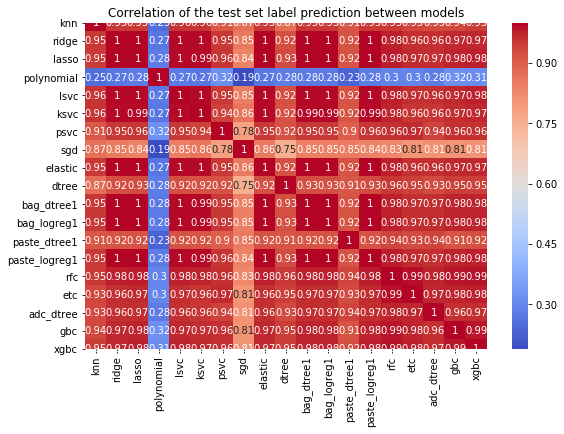

In [151]:
# Plot a heatmap of all correlations for easier visualization
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,6))
g = sns.heatmap(pred.corr(), annot=True, cmap='coolwarm', ax=ax)
g.set_title('Correlation of the test set label prediction between models')

In [152]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_bottom_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=True)
    return au_corr[0:n]


In [153]:
print("Bottom Absolute Correlations")
print(get_bottom_abs_correlations(pred, 5))

Bottom Absolute Correlations
polynomial  sgd             0.188748
            paste_dtree1    0.230804
knn         polynomial      0.249579
polynomial  ksvc            0.269516
            elastic         0.270456
dtype: float64


### Use Voting Regressor to combine results of top 5 models (all the models including models you ran for HW2) 

In [157]:
from sklearn.ensemble import VotingRegressor

In [163]:
vclf1 = VotingRegressor(estimators=
                              [('bag_dtree1', bag_dtree1_grid.best_estimator_), 
                               ('lasso', grid_lasso.best_estimator_), 
                               ('lsvc', grid_param_svr_linear.best_estimator_),
                               ('paste_logreg1', paste_logreg1_grid.best_estimator_),
                               ('bag_logreg1', bag_logreg1_grid.best_estimator_)
                              ])
vclf1_param = {}
vclf1_grid = GridSearchCV(vclf1, vclf1_param,cv=5, return_train_score=True, )
vclf1_grid.fit(X_train,y_train)


GridSearchCV(cv=5,
             estimator=VotingRegressor(estimators=[('bag_dtree1',
                                                    BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=9),
                                                                     max_samples=0.8,
                                                                     n_estimators=100,
                                                                     oob_score=True,
                                                                     random_state=0)),
                                                   ('lasso',
                                                    Lasso(alpha=500,
                                                          random_state=0)),
                                                   ('lsvc',
                                                    LinearSVR(C=3000,
                                                              max_iter=10000)),
                                  

In [164]:
print(f'Best Mean Cross Validation Score is {vclf1_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {vclf1_grid.best_params_}')
print(f'Train score is {vclf1_grid.score(X_train,y_train)}')
print(f'Test score is {vclf1_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8912373330097243
Best Mean Cross Validation Score is {}
Train score is 0.9245561589083415
Test score is 0.8824788875829973


In [165]:
vclf2 = VotingRegressor(estimators=
                              [('bag_dtree1', bag_dtree1_grid.best_estimator_), 
                               ('lasso', grid_lasso.best_estimator_), 
                               ('lsvc', grid_param_svr_linear.best_estimator_),
                               ('paste_logreg1', paste_logreg1_grid.best_estimator_),
                               ('bag_logreg1', bag_logreg1_grid.best_estimator_)
                              ])
vclf2_param = {}
vclf2_grid = GridSearchCV(vclf2, vclf2_param,cv=5, return_train_score=True, )
vclf2_grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=VotingRegressor(estimators=[('bag_dtree1',
                                                    BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=9),
                                                                     max_samples=0.8,
                                                                     n_estimators=100,
                                                                     oob_score=True,
                                                                     random_state=0)),
                                                   ('lasso',
                                                    Lasso(alpha=500,
                                                          random_state=0)),
                                                   ('lsvc',
                                                    LinearSVR(C=3000,
                                                              max_iter=10000)),
                                  

In [166]:
print(f'Best Mean Cross Validation Score is {vclf2_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {vclf2_grid.best_params_}')
print(f'Train score is {vclf2_grid.score(X_train,y_train)}')
print(f'Test score is {vclf2_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8912667567662599
Best Mean Cross Validation Score is {}
Train score is 0.924557204401675
Test score is 0.8824220469616125


### Use Voting Regressor to combine results of  models with least correlation.

In [173]:
vclf3 = VotingRegressor(estimators=
                              [('paste_dtree1', paste_dtree1_grid.best_estimator_), 
                               ('polynomial' , grid_poly.best_estimator_),
                               ('ksvc', grid_svr_kernel.best_estimator_),
                               ('knn', grid_knn.best_estimator_),
                               ('sgd' ,grid_sgd.best_estimator_)
                              ])
vclf3_param = {}
vclf3_grid = GridSearchCV(vclf3, vclf3_param,cv=5, return_train_score=True, )
vclf3_grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=VotingRegressor(estimators=[('paste_dtree1',
                                                    BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=9),
                                                                     bootstrap=False,
                                                                     max_samples=0.8,
                                                                     n_estimators=100,
                                                                     random_state=0)),
                                                   ('polynomial',
                                                    Pipeline(steps=[('polynomialfeatures',
                                                                     PolynomialFeatures(interaction_only='True')),
                                                                    ('linearregression',
                                                                     LinearRegression(

In [174]:
print(f'Best Mean Cross Validation Score is {vclf3_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {vclf3_grid.best_params_}')
print(f'Train score is {vclf3_grid.score(X_train,y_train)}')
print(f'Test score is {vclf3_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is -1.224867564563427e+21
Best Mean Cross Validation Score is {}
Train score is 0.9402878991085026
Test score is -9.951983040711087e+20


### Use Stacking Regressor to combine results of top 5 models (all the models including models you ran for HW2)

In [169]:
from sklearn.ensemble import StackingRegressor

In [178]:
sclf1 = StackingRegressor(estimators=
                              [('bag_dtree1', bag_dtree1_grid.best_estimator_), 
                               ('lasso', grid_lasso.best_estimator_), 
                               ('lsvc', grid_param_svr_linear.best_estimator_),
                               ('paste_logreg1', paste_logreg1_grid.best_estimator_),
                               ('bag_logreg1', bag_logreg1_grid.best_estimator_)
                              ], final_estimator=XGBRegressor())
sclf1_param = {}            
sclf1_grid = GridSearchCV(sclf1, sclf1_param,cv=5, return_train_score=True, )
sclf1_grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=StackingRegressor(estimators=[('bag_dtree1',
                                                      BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=9),
                                                                       max_samples=0.8,
                                                                       n_estimators=100,
                                                                       oob_score=True,
                                                                       random_state=0)),
                                                     ('lasso',
                                                      Lasso(alpha=500,
                                                            random_state=0)),
                                                     ('lsvc',
                                                      LinearSVR(C=3000,
                                                                max_iter=10000)),
          

In [179]:
print(f'Best Mean Cross Validation Score is {sclf1_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {sclf1_grid.best_params_}')
print(f'Train score is {sclf1_grid.score(X_train,y_train)}')
print(f'Test score is {sclf1_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8192673347048245
Best Mean Cross Validation Score is {}
Train score is 0.9089649260328002
Test score is 0.8909787231834181


### Use Stacking Regressor to combine results of  models with least correlation. 

In [ ]:
sclf2 = StackingRegressor(estimators=
                              [('paste_dtree1', paste_dtree1_grid.best_estimator_), 
                               ('polynomial' , grid_poly.best_estimator_),
                               ('ksvc', grid_svr_kernel.best_estimator_),
                               ('knn', grid_knn.best_estimator_),
                               ('sgd' ,grid_sgd.best_estimator_)
                              ], 
                           final_estimator=
                           XGBRegressor(random_state=42))
sclf2_param = { }
sclf2_grid = GridSearchCV(sclf2, sclf2_param,cv=5, return_train_score=True, )
sclf2_grid.fit(X_train,y_train)

In [ ]:
print(f'Best Mean Cross Validation Score is {sclf2_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {sclf2_grid.best_params_}')
print(f'Train score is {sclf2_grid.score(X_train,y_train)}')
print(f'Test score is {sclf2_grid.score(X_test,y_test)}')

### Models used with hyperparameters :

Linear Regression

KNN Regression(No. of neighbors and metric)

Ridge (Alpha)

Lasso (Alpha)

Polynomial Regression( polynomialfeatures__degree,polynomialfeatures__interaction_only)

SVM Models : Linear (C)
             rbf (C, gamma)
             Sigmoid (C, gamma)
             Polynomial (C, degree, gamma)
             
Decision Tree (max_depth, splitter)

Stochastic Gradient Descent (eta, penalty, alpha)

Elastic Net (Alpha, L1 ratio)

Bagging : Decision Tree (base_estimator__max_depth,max_samples, n_estimators)
          Lasso Regression (base_estimator__alpha)
          
Pasting : Decision Tree (base_estimator__max_depth,max_samples, n_estimators)
          Logistic Regression (base_estimator__alpha)
          
Random Forests (n_estimators, max_features,max_depth,criterion)

Ada Boost (base_estimator__criterion, base_estimator__splitter,base_estimator__max_depth, n_estimators,learning_rate)

Gradient Boost (max_depth, n_estimators, learning_rate)

Extra Trees (n_estimators,max_features, max_depth,criterion)

XG Boost ('max_depth,n_estimators,learning_rate,min_child_weight,subsample)
              
### XGBoost Classifier is the best model as the cross validation score is high and the difference between train score and test score is less.

Best model based on Scoring Method = Accuracy

The best model choosen based on CV score (0.85) is : XG Boost.

Best Mean Cross Validation Score is 0.9071588881611858

Parameters for the model {n_estimators=80, max_depth=6, learning_rate=0.1, objective='reg:squarederror'}

Train score is 0.9089649260328002

Test score is 0.8909787231834181